# Classification Models

## Categorical Data

In [ ]:
#Example of using label encoding

import pandas as pd
from sklearn.preprocessing import LabelEncoder


data = [[10,"red"],[20,"blue"],[12,"red"],[16,"green"],[22,"blue"] ]

df = pd.DataFrame(data,columns=["Length","Color"])


encoder = LabelEncoder()

df["Color"] = encoder.fit_transform(df["Color"])
df.head()

,Length,Color
0,10,2
1,20,0
2,12,2
3,16,1
4,22,0


In [ ]:
# Example of using One-hot encoding
data = [[10,"red"],[20,"blue"],[12,"red"],[16,"green"],[22,"blue"] ]

df = pd.DataFrame(data,columns=["Length","Color"])

df = pd.get_dummies(df,columns=["Color"])
df.head()

,Length,Color_blue,Color_green,Color_red
0,10,0,0,1
1,20,1,0,0
2,12,0,0,1
3,16,0,1,0
4,22,1,0,0


# Binary Classification

## Classifying Passengers Who Sailed on the Titanic

In [ ]:
#Using logistic regression to build a binary classification model from the dataset to if we can predict the odds that a passenger will survive using only Survived
#Age, Sex, Pclass 

# obtaining the titanic dataset

df = pd.read_csv("https://raw.githubusercontent.com/jeffprosise/Applied-Machine-Learning/main/Chapter%203/Data/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Checking to see if the dataset has any missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#removing the columns that aren't needed

df = df[["Survived","Age","Sex","Pclass"]]



In [ ]:
#Using one hot encoding on the Cat columns

df = pd.get_dummies(df,columns=["Sex","Pclass"])

In [ ]:
#removing the rows we na values

df.dropna(inplace=True)
df.head()

,Survived,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,0,1,0,0,1
1,1,38.0,1,0,1,0,0
2,1,26.0,1,0,0,0,1
3,1,35.0,1,0,1,0,0
4,0,35.0,0,1,0,0,1


In [ ]:
#Splitting the dataset for training and testing

from sklearn.model_selection import train_test_split

x = df.drop("Survived",axis=1)
y = df["Survived"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=0)

In [ ]:
#Training the model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8321678321678322

In [ ]:
#Scoring the model using cross-validation 

from sklearn.model_selection import cross_val_score

cross_val_score(model,x,y,cv=5).mean()

0.7857480547621394

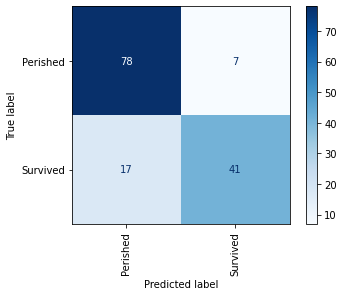

In [ ]:
#Displaying a confusion matrix showing how the model performed during testing

%matplotlib inline

from sklearn.metrics import ConfusionMatrixDisplay as cmd

cmd.from_estimator(model,x_test,y_test,display_labels=["Perished","Survived"],cmap="Blues",xticks_rotation="vertical")

In [ ]:
#Computing the model's precision,recall,sensitivity,specificity

from sklearn.metrics import precision_score , recall_score

y_pred = model.predict(x_test)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
sensitivity = recall
specificity = recall_score(y_test,y_pred,pos_label=0)


print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

Precision: 0.8541666666666666
Recall: 0.7068965517241379
Sensitivity: 0.7068965517241379
Specificity: 0.9176470588235294


In [ ]:
#Using the model to make predictions

female = pd.DataFrame({"Age":[30],"Sex_female":[1],"Sex_male":[0],"Pclass_1":[1],"Pclass_2":[0],"Pclass_3":[0]})
model.predict(female)[0]

1

In [ ]:
#obtaining the prob of survival

prob = model.predict_proba(female)[0][1]

print(f"Probability of survival: {prob:.1%}")

Probability of survival: 91.6%


In [ ]:
#Making another prediction

male = pd.DataFrame({"Age":[60],"Sex_female":[0],"Sex_male":[1],"Pclass_1":[1],"Pclass_2":[0],"Pclass_3":[1]})

In [ ]:
#obtaining the prob of survival

prob = model.predict_proba(male)[0][1]

print(f"Probability of survival: {prob:.1%}")

Probability of survival: 9.2%


## Detecting Credit Card Fraud

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#Checking for missing values and removing the missing rows


df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#Splitting the data into traing and testing datasets

x = df.drop(["Time","Class"],axis=1)
y = df["Class"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=0)

In [ ]:
#Training the model using logistic regression

lr_model = LogisticRegression(random_state=0,max_iter=5000)
lr_model.fit(x_train,y_train)

LogisticRegression(max_iter=5000, random_state=0)

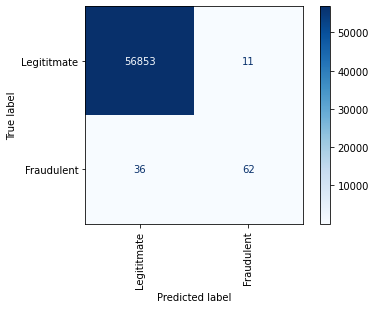

In [ ]:
#Using a confusion matrix to view how the model preformed

labels = ["Legititmate","Fraudulent"]
cmd.from_estimator(lr_model,x_test,y_test,display_labels=labels,cmap="Blues",xticks_rotation="vertical")

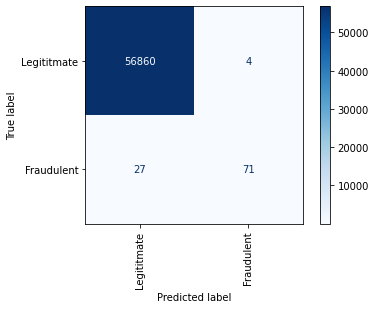

In [ ]:
#trying a random forest to see if we get better results

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(x_train,y_train)

cmd.from_estimator(rf_model,x_test,y_test,display_labels=labels,cmap="Blues",xticks_rotation="vertical")

#Building a Digital Recognition Model

In [ ]:
#importing the handwriten digits dataset

from sklearn import datasets

digits = datasets.load_digits()
print("digits images " + str(digits.images.shape))
print("digits target: " + str(digits.target.shape))

digits images (1797, 8, 8)
digits target: (1797,)


In [ ]:
#display of what the first digit looks like in matrix form

digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

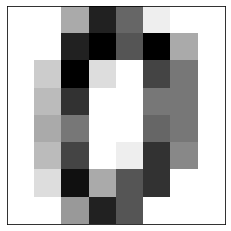

In [ ]:
from pandas.core.indexes.base import InvalidIndexError
#showing what the digits looks to the eye

%matplotlib inline
import matplotlib.pyplot as plt

plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
plt.imshow(digits.images[0],cmap=plt.cm.gray_r)

(array([178., 182., 177., 183., 181., 182., 181., 179., 174., 180.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

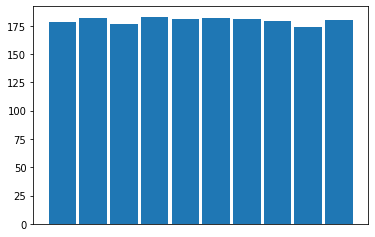

In [ ]:
#Plotting the distribution of the samples

plt.xticks([])
plt.hist(digits.target,rwidth=0.9)

In [ ]:
#Splitting the model into train/test to train the regression model

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.2,random_state=0)

model = LogisticRegression(max_iter=5000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=5000)

In [ ]:
#scoring the model

model.score(x_test,y_test)

0.9583333333333334

In [ ]:
#creating a confusion matrix to see how the model performed

import seaborn as sns
sns.set()

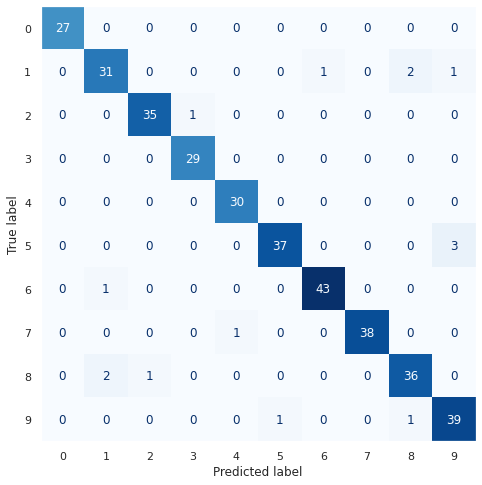

In [ ]:
fig,ax = plt.subplots(figsize=(8,8))
ax.grid(False)
cmd.from_estimator(model,x_test,y_test,cmap="Blues",colorbar=False,ax=ax)

In [ ]:
# The image is encouraging large numbers and dark colors along the diagonal and small numbers and light colors outside the diagonal

In [ ]:
#Using the model to make a prediction 

model.predict([digits.data[100]])[0]

4